In [149]:
# importing necessary python packages
import pandas as pd
import numpy as np
import pickle

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA

In [150]:
# selecting and loading the data
df = pd.read_csv("okcupid_profiles.csv")

df.columns

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'pets', 'religion', 'sign',
       'smokes', 'speaks', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4',
       'essay5', 'essay6', 'essay7', 'essay8', 'essay9'],
      dtype='object')

In [151]:
# retrieving the features we will work with
features = ["age", "status", "sex", "orientation", "drinks", "drugs", "height", "smokes"]
df = df[features]

In [152]:
df.head()

,age,status,sex,orientation,drinks,drugs,height,smokes
0,22,single,m,straight,socially,never,75.0,sometimes
1,35,single,m,straight,often,sometimes,70.0,no
2,38,available,m,straight,socially,NaN,68.0,no
3,23,single,m,straight,socially,NaN,71.0,no
4,29,single,m,straight,socially,never,66.0,no


In [153]:
df.shape

(59946, 8)

In [154]:
df[df.columns].dtypes

,0
age,int64
status,object
sex,object
orientation,object
drinks,object
drugs,object
height,float64
smokes,object


In [155]:
df[df.columns].nunique()

,0
age,54
status,5
sex,2
orientation,3
drinks,6
drugs,3
height,60
smokes,5


In [156]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print("\n")

age
[ 22  35  38  23  29  32  31  24  37  28  30  39  33  26  27  20  25  40
  36  21  34  43  46  41  42  45  18  55  50  59  44  48  54  51  62  52
  19  58  66  53  63  47  49  61  60  57  56  65  64  68 110  69  67 109]


status
['single' 'available' 'seeing someone' 'married' 'unknown']


sex
['m' 'f']


orientation
['straight' 'bisexual' 'gay']


drinks
['socially' 'often' 'not at all' 'rarely' nan 'very often' 'desperately']


drugs
['never' 'sometimes' nan 'often']


height
[75. 70. 68. 71. 66. 67. 65. 72. 62. 64. 69. 73. 74. 60. 63. 76. 61. 78.
 79. 59. 80. 91. 83. 77. 58. 56. 95. 57. 87. 81. 36. 43. 52. 55. 53. 93.
  8. 54. 82.  3. 86. 42. 84. 94. 50.  6. 47. 49. 48. 90. 88. nan 37.  9.
 51.  1. 92. 26. 85. 89.  4.]


smokes
['sometimes' 'no' nan 'when drinking' 'yes' 'trying to quit']




In [157]:
# let us check and remove the duplicate values
df.duplicated().sum()

np.int64(35427)

In [158]:
df.drop_duplicates(inplace=True)

In [159]:
# let us check and remove the duplicate values
df.duplicated().sum()

np.int64(0)

In [160]:
df.shape

(24519, 8)

In [161]:
# checking null values
df[df.columns].isnull().sum()

,0
age,0
status,0
sex,0
orientation,0
drinks,2045
drugs,6837
height,3
smokes,3279


In [162]:
df['orientation'].value_counts()

,count
orientation,
straight,18096
gay,3902
bisexual,2521


In [163]:
df['drinks'].value_counts()

,count
drinks,
socially,12598
often,3736
rarely,3315
not at all,2047
very often,463
desperately,315


In [164]:
df['drugs'].value_counts()

,count
drugs,
never,12000
sometimes,5281
often,401


In [165]:
df['smokes'].value_counts()

,count
smokes,
no,13193
sometimes,2750
when drinking,2102
yes,1910
trying to quit,1285


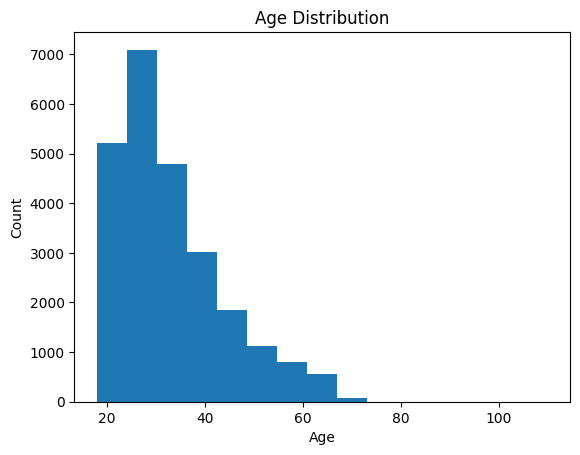

In [183]:
# checking the distribution of age
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df["age"], bins=15)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()


In [166]:
imputer = SimpleImputer(strategy="most_frequent")
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [167]:
df[df.columns].isnull().sum()

,0
age,0
status,0
sex,0
orientation,0
drinks,0
drugs,0
height,0
smokes,0


In [168]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print("\n")

age
[22 35 38 23 29 32 31 24 37 28 30 39 33 26 27 20 25 40 36 21 34 43 46 41
 42 45 18 55 50 59 44 48 54 51 62 52 19 58 66 53 63 47 49 61 60 57 56 65
 64 68 110 69 67 109]


status
['single' 'available' 'seeing someone' 'married' 'unknown']


sex
['m' 'f']


orientation
['straight' 'bisexual' 'gay']


drinks
['socially' 'often' 'not at all' 'rarely' 'very often' 'desperately']


drugs
['never' 'sometimes' 'often']


height
[75.0 70.0 68.0 71.0 66.0 67.0 65.0 72.0 62.0 64.0 69.0 73.0 74.0 60.0
 63.0 76.0 61.0 78.0 79.0 59.0 80.0 91.0 83.0 77.0 58.0 56.0 95.0 57.0
 87.0 81.0 36.0 43.0 52.0 55.0 53.0 93.0 8.0 54.0 82.0 3.0 86.0 42.0 84.0
 94.0 50.0 6.0 47.0 49.0 48.0 90.0 88.0 37.0 9.0 51.0 1.0 92.0 26.0 85.0
 89.0 4.0]


smokes
['sometimes' 'no' 'when drinking' 'yes' 'trying to quit']




In [169]:
# encoding the categorical features
encoding_maps = {
    "status": {"single": 0, "available": 1, "seeing someone": 2, "married": 3, "unknown": 4},
    "sex": {"m": 0, "f": 1},
    "orientation": {"straight": 0, "bisexual": 1, "gay": 2},
    "drinks": {
        "not at all": 0, "rarely": 1, "socially": 2,
        "often": 3, "very often": 4, "desperately": 5
    },
    "drugs": {"never": 0, "sometimes": 1, "often": 2},
    "smokes": {
        "no": 0, "sometimes": 1, "when drinking": 2,
        "yes": 3, "trying to quit": 4
    }
}

df.replace(encoding_maps, inplace=True)

/tmp/ipython-input-469829801.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(encoding_maps, inplace=True)


In [170]:
df.head()

,age,status,sex,orientation,drinks,drugs,height,smokes
0,22,0,0,0,2,0,75.0,1
1,35,0,0,0,3,1,70.0,0
2,38,1,0,0,2,0,68.0,0
3,23,0,0,0,2,0,71.0,0
4,29,0,0,0,2,0,66.0,0


In [171]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print("\n")

age
[22 35 38 23 29 32 31 24 37 28 30 39 33 26 27 20 25 40 36 21 34 43 46 41
 42 45 18 55 50 59 44 48 54 51 62 52 19 58 66 53 63 47 49 61 60 57 56 65
 64 68 110 69 67 109]


status
[0 1 2 3 4]


sex
[0 1]


orientation
[0 1 2]


drinks
[2 3 0 1 4 5]


drugs
[0 1 2]


height
[75.0 70.0 68.0 71.0 66.0 67.0 65.0 72.0 62.0 64.0 69.0 73.0 74.0 60.0
 63.0 76.0 61.0 78.0 79.0 59.0 80.0 91.0 83.0 77.0 58.0 56.0 95.0 57.0
 87.0 81.0 36.0 43.0 52.0 55.0 53.0 93.0 8.0 54.0 82.0 3.0 86.0 42.0 84.0
 94.0 50.0 6.0 47.0 49.0 48.0 90.0 88.0 37.0 9.0 51.0 1.0 92.0 26.0 85.0
 89.0 4.0]


smokes
[1 0 2 3 4]




In [172]:
# the feature scaling part
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [173]:
# applying DBSCAN to find the number of optimal clusters
dbscan = DBSCAN(eps=1.2, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)

unique_labels = set(dbscan_labels)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

print("Optimal clusters found by DBSCAN:", n_clusters)
print("Noise points:", list(dbscan_labels).count(-1))

Optimal clusters found by DBSCAN: 42
Noise points: 824


In [174]:
# for the time being let us take optimal number of clusters say 7
kmeans_model = KMeans(
    n_clusters=7,
    random_state=42,
    n_init=10
)

kmeans_labels = kmeans_model.fit_predict(X_scaled)
df["cluster"] = kmeans_labels

In [175]:
with open("kmeans_matchmaking_model.pkl", "wb") as file:
    pickle.dump((kmeans_model, scaler, df), file)

In [176]:
from sklearn.metrics.pairwise import euclidean_distances

In [177]:
# using a test case to check the pickle file
# first we load the trained K-Means model, scaler, and dataset
with open("kmeans_matchmaking_model.pkl", "rb") as file:
    kmeans_model, scaler, df = pickle.load(file)

In [178]:
# we will use the same encoding map for decoding the catergorical values

In [179]:
# function to find top matches
def find_matches(test_user):
    user_orientation = test_user["orientation"]
    user_sex = test_user["sex"]

    def is_match(candidate):
        candidate_sex = candidate["sex"]
        candidate_orientation = candidate["orientation"]
        if user_orientation == 0:
            return (user_sex == 0 and candidate_sex == 1 and candidate_orientation in [0, 1]) or \
                   (user_sex == 1 and candidate_sex == 0 and candidate_orientation in [0, 1])
        elif user_orientation == 1:
            return candidate_orientation in [0, 1]
        elif user_orientation == 2:
            return user_sex == candidate_sex and candidate_orientation == 2
        return False

    # predict which cluster the test user belongs from
    test_features = np.array([[test_user["age"], test_user["status"], test_user["sex"], test_user["orientation"],
                               test_user["drinks"], test_user["drugs"], test_user["height"], test_user["smokes"]]])
    test_features_scaled = scaler.transform(test_features)
    cluster = kmeans_model.predict(test_features_scaled)[0]

    # find candidates in the same cluster
    cluster_candidates = df[df["cluster"] == cluster].copy()

    # apply matching rules
    candidates = cluster_candidates[cluster_candidates.apply(is_match, axis=1)].copy()

    # compute distance-based scores
    candidate_features = scaler.transform(candidates[["age", "status", "orientation", "drinks", "drugs", "height", "smokes"]])
    match_distances = euclidean_distances(candidate_features, test_features_scaled).flatten()

    candidates.loc[:, "distance_score"] = match_distances
    candidates = candidates.sort_values(by=["distance_score"], ascending=True)

    top_matches = candidates.head(10).copy()

    for col, mapping in encoding_maps.items():
        if col in top_matches.columns:
            top_matches[col] = top_matches[col].map(mapping)

    return top_matches[["Name", "age", "status", "sex", "orientation", "distance_score"]].to_dict(orient="records")


In [180]:
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

def find_matches(test_user, df, kmeans_model, scaler):
    user_orientation = test_user["orientation"]
    user_sex = test_user["sex"]

    # matching logic
    def is_match(candidate):
        c_sex = candidate["sex"]
        c_orientation = candidate["orientation"]

        if user_orientation == 0:  # straight
            return (
                user_sex == 0 and c_sex == 1 and c_orientation in [0, 1]
            ) or (
                user_sex == 1 and c_sex == 0 and c_orientation in [0, 1]
            )

        elif user_orientation == 1:  # bisexual
            return c_orientation in [0, 1]

        elif user_orientation == 2:  # gay
            return user_sex == c_sex and c_orientation == 2

        return False

    # --- build test feature vector (ORDER MATTERS) ---
    test_features = np.array([[
        test_user["age"],
        test_user["status"],
        test_user["sex"],
        test_user["orientation"],
        test_user["drinks"],
        test_user["drugs"],
        test_user["height"],
        test_user["smokes"]
    ]])

    test_scaled = scaler.transform(test_features)
    cluster = kmeans_model.predict(test_scaled)[0]

    # --- filter same cluster ---
    cluster_df = df[df["cluster"] == cluster].copy()

    # --- apply orientation rules ---
    candidates = cluster_df[cluster_df.apply(is_match, axis=1)].copy()

    if candidates.empty:
        return []

    # --- distance ranking ---
    candidate_features = scaler.transform(
        candidates[[
            "age", "status", "sex", "orientation",
            "drinks", "drugs", "height", "smokes"
        ]]
    )

    distances = euclidean_distances(candidate_features, test_scaled).flatten()
    candidates["distance_score"] = distances

    candidates = candidates.sort_values("distance_score")
    numberOfMatches = len(candidates)

    return candidates.head(numberOfMatches)[
        ["age", "status", "sex", "orientation", "distance_score"]
    ].to_dict(orient="records")


In [184]:
test_case = {
    "age": 28,
    "status": 0,      # single
    "sex": 1,         # female
    "orientation": 0, # straight
    "drinks": 1,      # rarely
    "drugs": 0,       # never
    "height": 70.0,
    "smokes": 0       # no
}

matches = find_matches(
    test_case,
    df,
    kmeans_model,
    scaler
)

for m in matches:
    print(m)


{'age': 29, 'status': 0, 'sex': 0, 'orientation': 0, 'distance_score': 2.8492268747061287}
{'age': 23, 'status': 0, 'sex': 0, 'orientation': 0, 'distance_score': 2.8859004632398673}
{'age': 20, 'status': 0, 'sex': 0, 'orientation': 0, 'distance_score': 2.9445210130887634}
{'age': 27, 'status': 0, 'sex': 0, 'orientation': 0, 'distance_score': 3.05889355539355}
{'age': 26, 'status': 0, 'sex': 0, 'orientation': 0, 'distance_score': 3.063188003657422}
{'age': 25, 'status': 0, 'sex': 0, 'orientation': 0, 'distance_score': 3.070332069438364}
{'age': 23, 'status': 0, 'sex': 0, 'orientation': 0, 'distance_score': 3.093082197971567}
{'age': 29, 'status': 0, 'sex': 0, 'orientation': 0, 'distance_score': 3.2088131314094843}
{'age': 30, 'status': 0, 'sex': 0, 'orientation': 0, 'distance_score': 3.2129071998469696}
{'age': 26, 'status': 0, 'sex': 0, 'orientation': 0, 'distance_score': 3.2129071998469696}
{'age': 24, 'status': 0, 'sex': 0, 'orientation': 0, 'distance_score': 3.229231568797554}
{'age

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
